In [1]:
import torch
import math
import random

#随机一个正态分布
mu = random.uniform(-100, 100)
sigma = random.uniform(0, 5)

#从该正态分布中采样
dist = torch.distributions.Normal(mu, sigma)
x = dist.rsample()

#求高斯密度函数
dist.log_prob(x).item()

-2.3368020057678223

   1. `sample()` 是標準的採樣：這是最直接、最符合統計學定義的採樣方法。它就是從一個給定的機率分佈中隨機抽取一個樣本。但如我們所討論的，這個過程
      在計算圖中是不可微分的。

   2. `rsample()` 是特殊的、可微分的採樣：開發者們需要一個新的方法，這個方法在功能上也是「採樣」，但它內部實現了「重參數化技巧」，使得整個過程
      可以被梯度下降法優化。

  為了區分這兩種行為，他們就在標準的 sample 前面加上了代表核心技術的字母 "r"，創造了 rsample 這個新名字。

  所以，當你在使用 PyTorch 的 distributions 函式庫時，這個命名慣例給了你一個清晰的信號：

   * 如果你只是想單純地從一個分佈中獲取隨機樣本，而不需要對其進行反向傳播，就用 sample()。
   * 如果你正在訓練一個神經網路，需要讓梯度能夠穿過採樣步驟，流回網路的參數，那麼你必須使用 rsample()。

  它是一個簡潔而有效的命名，直接將函式名與其背後關鍵的數學技巧「Reparameterization Trick」綁定在了一起。

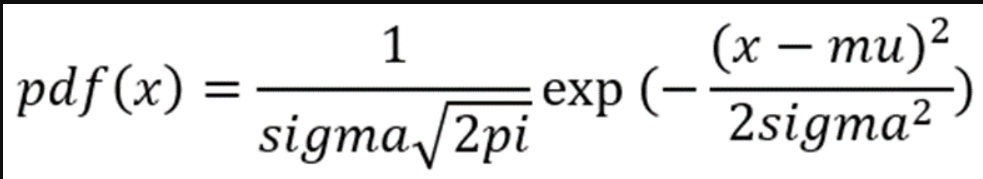

$$ \mathrm{pdf}(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right) $$

In [2]:
#手动计算高斯密度函数
def log_pdf(x, mu, sigma):
    left = 1 / (sigma * (2 * math.pi)**0.5)
    right = math.exp(-(x - mu)**2 / (2 * sigma**2))
    return math.log(left) + math.log(right)


log_pdf(x, mu, sigma)

-2.3368021874484146